# Proyek Analisis Data: Nama dataset
- Nama: Mohamad Farizul Rizki
- Email: izoel.tkj@gmail.com
- Id Dicoding: farizul30

## Menentukan Pertanyaan Bisnis

- Bagaimana Performa Rental Sepeda Pada Musim Dingin?
- Bagaimana Performa Rental Sepeda di tahun 2012?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# import data
df = pd.read_csv('data/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# pengecekan dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Assessing Data

In [4]:
# pengecekan missing value
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# pengecekan duplicated value
df.duplicated().sum()

0

### Cleaning Data

In [6]:
# ubah tipe data object to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

In [7]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [9]:
# buat season group
df["season_group"] = df.season.apply(lambda x: "Springer" if x == 1 else ("Summer" if x == 2 else ("Fall" if x == 3 else "Winter")))

In [10]:
df.groupby(by="season_group").instant.nunique().sort_values(ascending=False)

season_group
Fall        4496
Summer      4409
Springer    4242
Winter      4232
Name: instant, dtype: int64

In [11]:
# buat day group
df["week_group"] = df.weekday.apply(lambda x: "Minggu" if x == 0 else ("Senin" if x == 1 else ("Selasa" if x == 2 else ("Rabu" if x == 3 else ("Kamis" if x == 4 else ("Jum'at" if x == 5 else "Sabtu"))))))

In [12]:
df.groupby(by="week_group").instant.nunique().sort_values(ascending=False)

week_group
Sabtu     2512
Minggu    2502
Jum'at    2487
Senin     2479
Rabu      2475
Kamis     2471
Selasa    2453
Name: instant, dtype: int64

In [13]:
# buat year group
df["year_group"] = df.yr.apply(lambda x: "2011" if x == 0 else "2012")

In [14]:
df.groupby(by="year_group").instant.nunique().sort_values(ascending=False)

year_group
2012    8734
2011    8645
Name: instant, dtype: int64

In [15]:
# buat month group
df["month_group"] = df.mnth.apply(lambda x: "Januari" if x == 1 else ("Februari" if x == 2 else ("Maret" if x == 3 else ("April" if x == 4 else ("Mei" if x == 5 else ("Juni" if x == 6 else ("Juli" if x == 7 else ("Agustus" if x == 8 else ("September" if x == 9 else ("Oktober" if x == 10 else ("November" if x == 11 else "Desember")))))))))))

In [16]:
df.groupby(by="month_group").instant.nunique().sort_values(ascending=False)

month_group
Juli         1488
Mei          1488
Desember     1483
Agustus      1475
Maret        1473
Oktober      1451
Juni         1440
April        1437
November     1437
September    1437
Januari      1429
Februari     1341
Name: instant, dtype: int64

In [17]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,season_group,week_group,year_group,month_group
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,Springer,Sabtu,2011,Januari
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,Springer,Sabtu,2011,Januari
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,Springer,Sabtu,2011,Januari
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,Springer,Sabtu,2011,Januari
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,Springer,Sabtu,2011,Januari


In [18]:
df.groupby(by=["season_group", "year_group", "month_group"]).agg({
    "instant": "nunique",
    "cnt": "sum",
    "registered":  "sum",
    "casual":  "sum"
})

instant     cnt  registered  casual
season_group year_group month_group                                     
Fall         2011       Agustus          731  136691      107849   28842
                        Juli             744  141341      104889   36452
                        Juni             240   49726       39413   10313
                        September        525   91892       72049   19843
             2012       Agustus          744  214503      171306   43197
                        Juli             744  203607      161902   41705
                        Juni             240   65662       52214   13448
                        September        528  157707      125416   32291
Springer     2011       Desember         261   22390       19237    3153
                        Februari         649   48215       41973    6242
                        Januari          688   38189       35116    3073
                        Maret            470   41206       32249    8957
             2012       Desember         262   20608       17298    3310
                        Februari         692  103137       94416    8721
                        Januari          741   96744       87775    8969
                        Maret            479  100859       82662   18197
Summer       2011       April            719   94870       72524   22346
                        Juni             480   93786       73487   20299
                        Maret            260   22839       18970    3869
                        Mei              744  135821      104771   31050
             2012       April            718  174224      135768   38456
                        Juni             480  137168      107322   29846
                        Maret            264   64016       50595   13421
                        Mei              744  195865      151630   44235
Winter       2011       Desember         480   64933       59638    5295
                        November         719  102167       86573   15594
                        Oktober          743  123511       98289   25222
                        September        192   35526       28824    6702
             2012       Desember         480  103105       93170    9935
                        November         718  152664      131655   21009
                        Oktober          708  198841      164303   34538
                        September        192   60866       49379   11487

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

tahun
2011    Axes(0.125,0.11;0.775x0.77)
2012    Axes(0.125,0.11;0.775x0.77)
Name: data_count, dtype: object

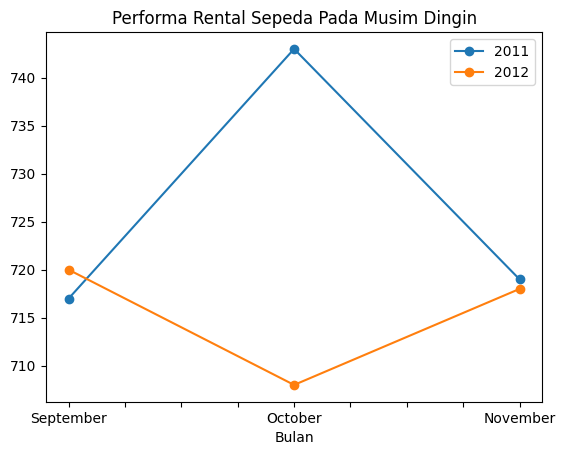

In [19]:
monthly_orders_df = df.resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "cnt": "sum",
    "year_group": "last",
    "season_group": "last"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi nama bulan
 
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "instant": "data_count",
    "cnt": "total",
    "year_group": "tahun",
    "season_group": "musim"
}, inplace=True)

# musim winter only
season = monthly_orders_df[monthly_orders_df['musim']=='Winter']
season.sort_values('tahun', ascending=True)
season.groupby('tahun').total.nunique().sort_values(ascending=False)

season.set_index('dteday', inplace=True)
season.groupby('tahun')['data_count'].plot(legend=True, xlabel='Bulan', style='-o', title='Performa Rental Sepeda Pada Musim Dingin')

### Pertanyaan 2: 

tahun
2012    Axes(0.125,0.11;0.775x0.77)
Name: data_count, dtype: object

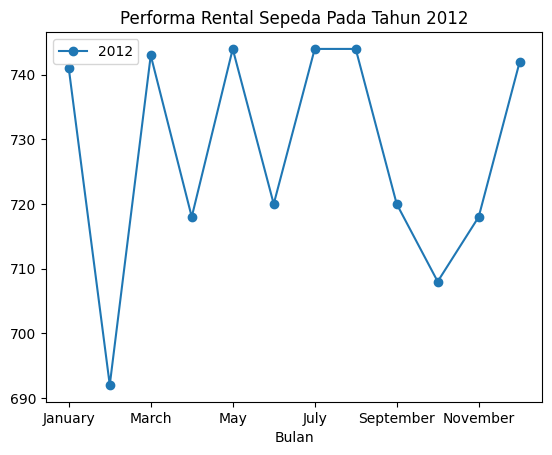

In [20]:
# musim winter only
tahunn = monthly_orders_df[monthly_orders_df['tahun']=='2012']
tahunn.sort_values('dteday', ascending=True)
tahunn.groupby('tahun').total.nunique().sort_values(ascending=False)

tahunn.set_index('dteday', inplace=True)
tahunn.groupby('tahun')['data_count'].plot(legend=True, xlabel='Bulan', style='-o',  title='Performa Rental Sepeda Pada Tahun 2012')

In [22]:
df.to_csv("data/main_data.csv", index=False)

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2

- conclution Pertanyaan 1 :
- Untuk Performa Rental Sepeda pada Musim Dingin paling banyak di bulan oktober pada tahun 2011, sedangkan pada tahun 2012 memiliki Performa Rental yang menurun
- conclution pertanyaan 2 :
- Untuk Performa Rental Sepeda pada tahun 2012 paling banyak pada bulan Mei dan Agustus sebanyak 744, sedangkan pada bulan Februari hanya mendapatkan 692 rental